# **EDA**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

-  train dataset has 103904 entries and 25 coloumns
-  test dataset has 25976 entries and 25 coloumns

* AS seen , `Unnamed: 0`  column has no meaning so we drop it 
*  also`id` column doesn't affect on target so we drop it also

In [ ]:
train.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
test.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)

In [ ]:
train.info()
print("********************************************************************************")
print("********************************************************************************")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [ ]:
train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [ ]:
test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

1. train dataset null values:
    - there are 310 null values in `Arrival Delay in Minutes` columns <BR> <BR>

2. test dataset null values:
    - there are 83 null values in `Arrival Delay in Minutes` collumns

###### Num of Null values are small so we can drop them

In [ ]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
train2 = train.copy()

In [ ]:
numerical = train.select_dtypes(exclude=['object']).copy()
numerical

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103900,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


In [ ]:
categorical = train.select_dtypes(include=['object']).copy()
categorical

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


In [ ]:
numerical.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


- #### difference between mean and mode indicates outliers But equality in mode and median indicates normal distribution

- ##### mean and mode is almost equal in all the columns except:
    -  Flight Distance 
    - Departure Delay in Minutes
    - Arrival Delay in Minutes

**so we can guess ouliers in those columns.**

In [ ]:
categorical.describe()

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [ ]:
# convert numerical data into categorical
train["Gender"] = train["Gender"].map({"Male":1,"Female":0})
test['Gender'] = test["Gender"].map({"Male":1, "Female":0})
train["Customer Type"] = train["Customer Type"].map({"Loyal Customer":1,"disloyal Customer":0})
test["Customer Type"] = test["Customer Type"].map({"Loyal Customer":1,"disloyal Customer":0})
train["Type of Travel"] = train["Type of Travel"].map({"Personal Travel":1,"Business travel":0})
test["Type of Travel"] = test["Type of Travel"].map({"Personal Travel":1,"Business travel":0})
train["Class"] = train["Class"].map({"Eco Plus":1,"Eco":0,"Business":-1})
test["Class"] = test["Class"].map({"Eco Plus":1,"Eco":0,"Business":-1})
train["satisfaction"] = train["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0,})
test["satisfaction"] = test["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0,})



In [ ]:
corr=train.corr()

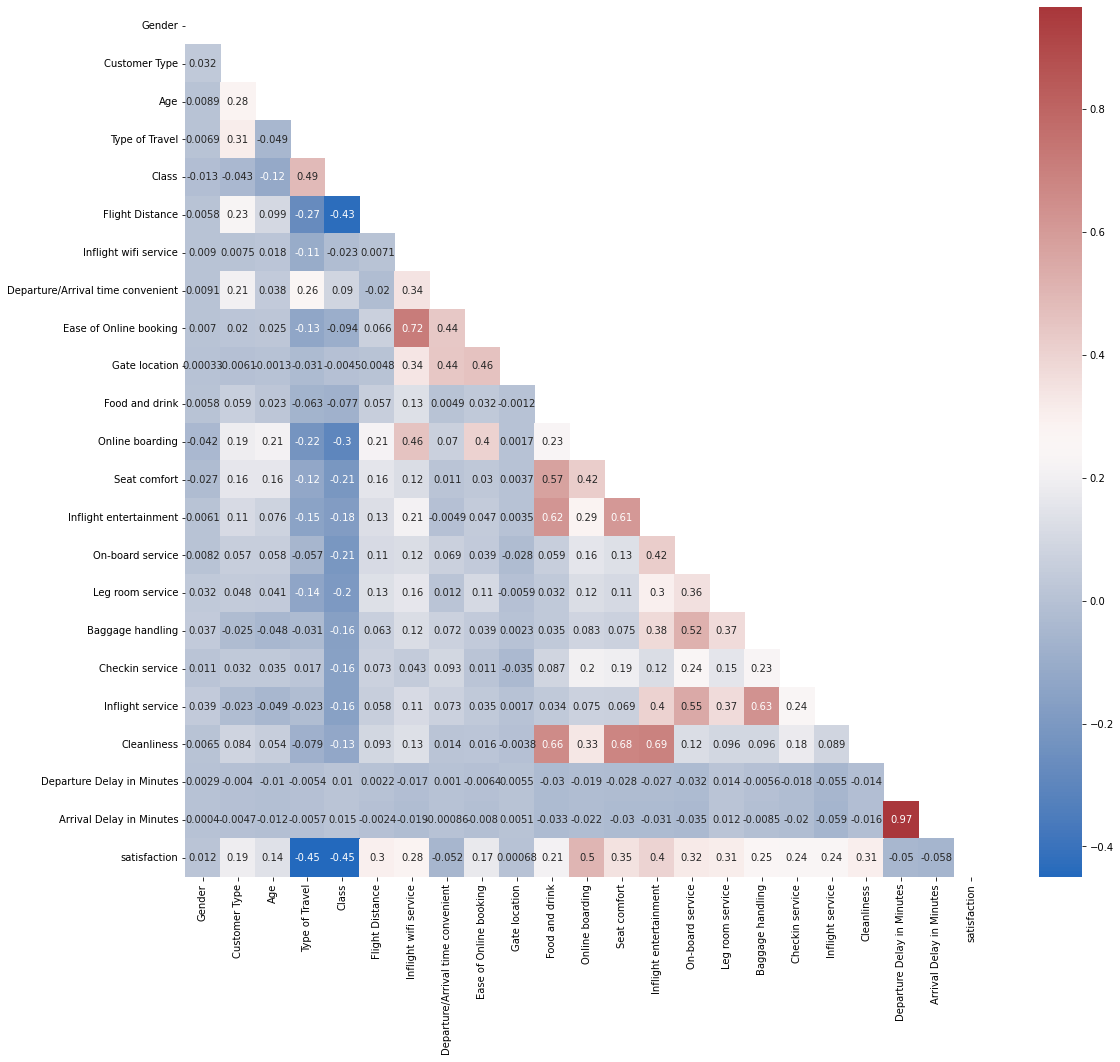

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(train.corr(), dtype=bool))

f, ax = plt.subplots(figsize=(18,16))
sns.heatmap(corr, mask=mask, annot=True,cmap= "vlag",)

- **High correlation between:**
    - `Departure Delay in Minutes` & `Arrival Delay in Minutes`  >> 0.97
    - `Ease of Online booking` & `Inflight wifi service`  >> 0.72
    - `Cleanliness` & `Inflight entertainment`  >> 0.69
    - `Cleanliness` & `Seat comfort`  >> 0.68
    - `Cleanliness` & `Food and drink`  >> 0.66
    - `Inflight service` & `Baggage handling`  >> 0.63

- __As correlation between Departure Delay in Minutes & Arrival Delay in Minutes is so high then we can drop one of them__

In [ ]:
train.drop(['Arrival Delay in Minutes'], axis = 1,inplace=True)
test.drop(['Arrival Delay in Minutes'], axis = 1,inplace=True)

In [ ]:
corr["satisfaction"].sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.503557
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Customer Type                        0.187638
Ease of Online booking               0.171705
Age                                  0.137167
Gender                               0.012211
Gate location                        0.000682
Departure Delay in Minutes          -0.050494
Departure/Arrival time convenient   -0.051601
Arrival Delay in Minutes            -0.057582
Type of Travel                    

- __the most satisfaction correlation is with "Online boarding" (0.5)__

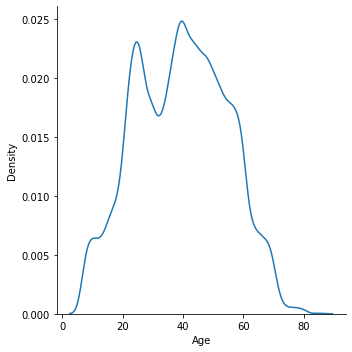

In [ ]:
sns.displot(data=train, x="Age", kind="kde")

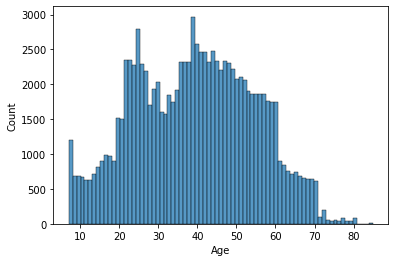

In [ ]:
sns.histplot(data=train, x= "Age")

the disturbtion of people age: 
- the most age range from 25 to 35 and from 40 to 60 
(this means to focus more on the needs of this age) 
- For children between(1,10) >> خصم علي التيكت
- For old pepole older than 65 >> provide مرافقين for them. 

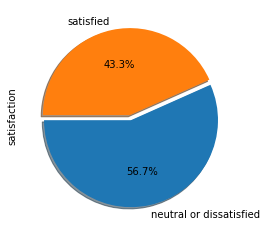

In [ ]:
 round(train2['satisfaction'].value_counts()/train.shape[0]*100,2).plot.pie(autopct='%1.1f%%',shadow=True, startangle=180,explode = [0.06, 0])

- Data is Balanced
- ratio between satisfied and dissatisfied people 
( our target to increase the ratio of satisfied people ) 

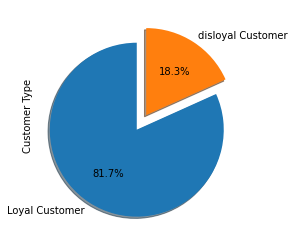

In [ ]:
 round(train2['Customer Type'].value_counts()/train.shape[0]*100,2).plot.pie(autopct='%1.1f%%',shadow=True, startangle=90,explode = [0.2, 0])

- ratio between loyal and disloyal customers
( حاجة كويسة ممكن نستغلها لصالحنا في الاعلانات مثلا )

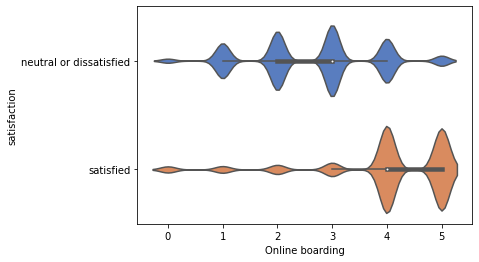

In [ ]:
ax = sns.violinplot(x="Online boarding", y="satisfaction",
                    data=train2, palette="muted")

- relation between online boarding and satisfaction
( as the online boarding satisfaction increase, the overall satsifaction increases and vice versa)
- so try to imporve online boarding more.

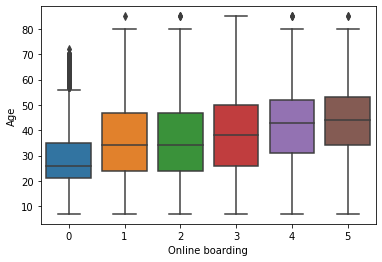

In [ ]:
sns.boxplot(x="Online boarding", y="Age" , data=train2)

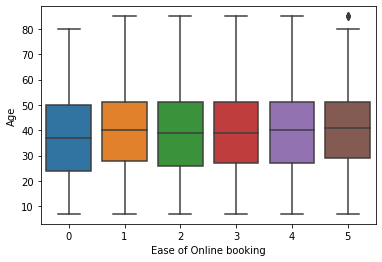

In [ ]:
sns.boxplot(x="Ease of Online booking", y="Age" , data=train2)

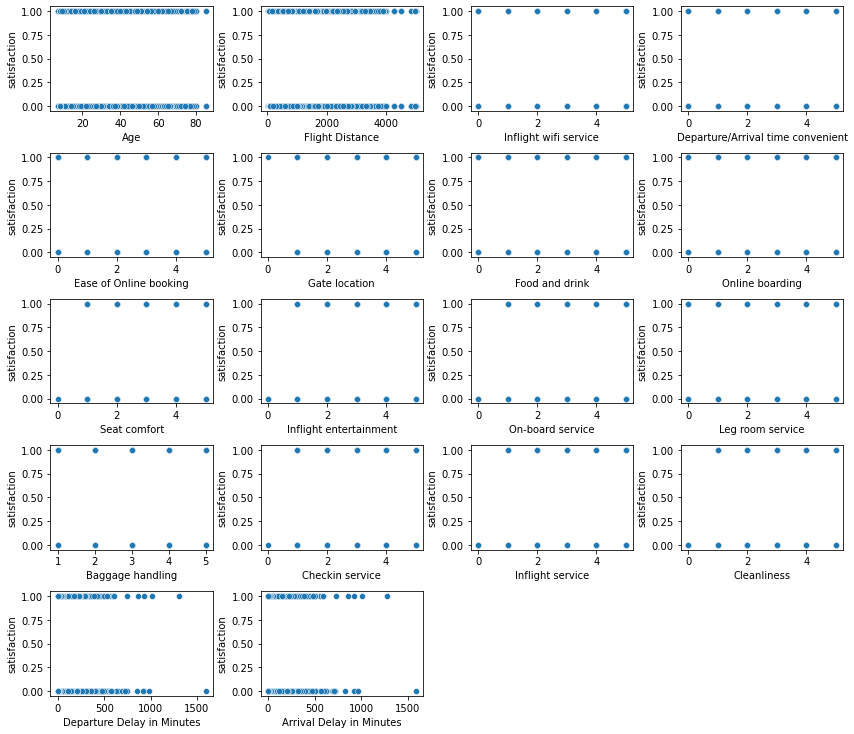

In [ ]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(numerical.iloc[:, i],train['satisfaction'])
plt.tight_layout()
plt.show()

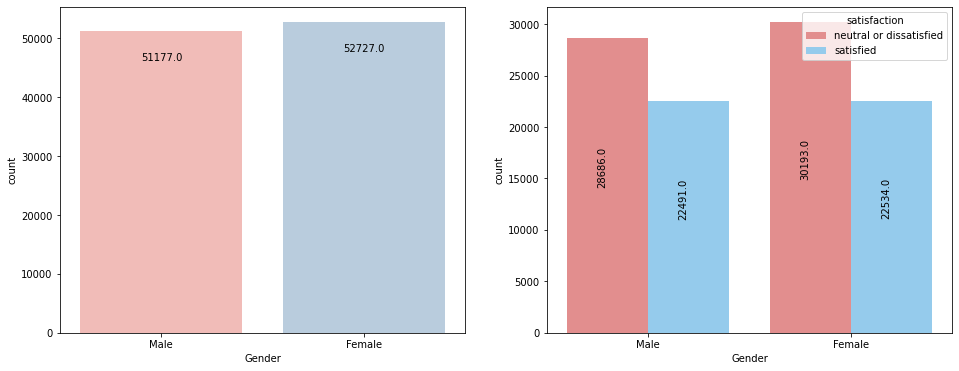

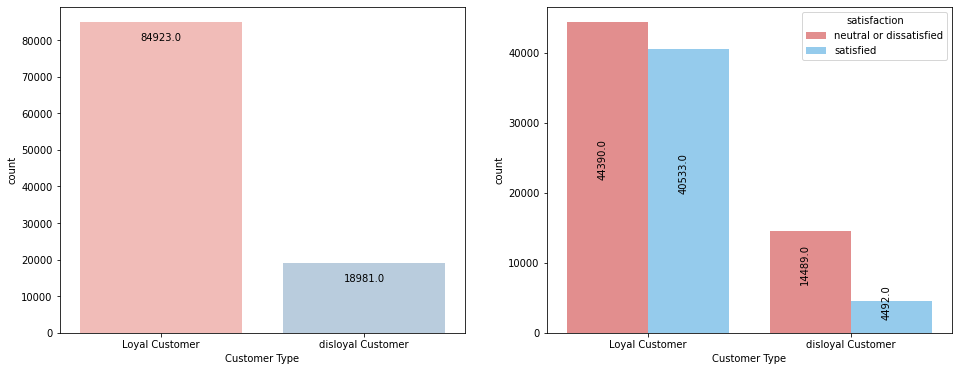

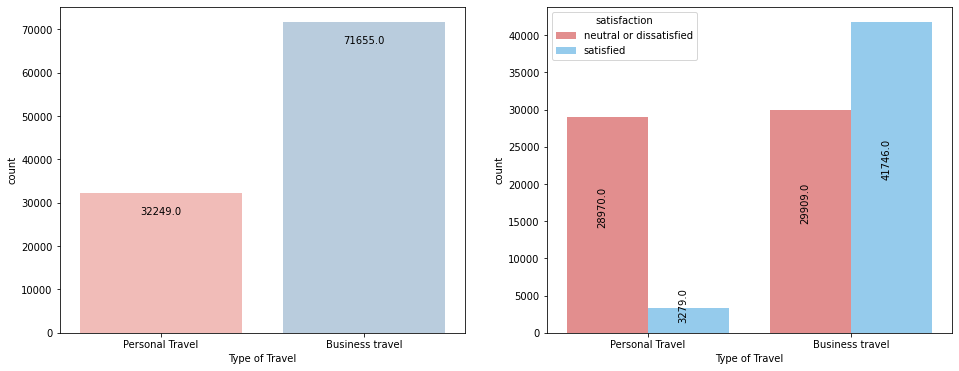

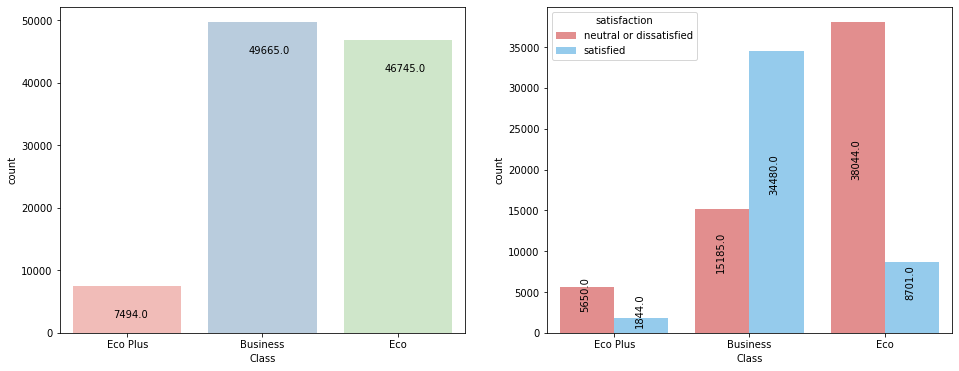

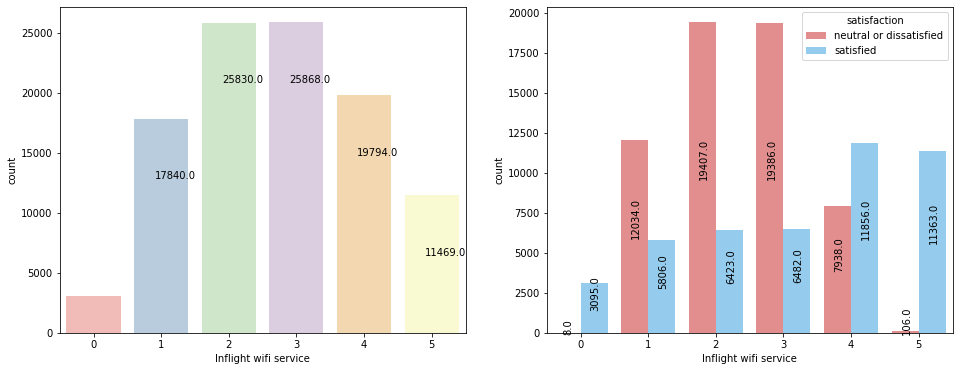

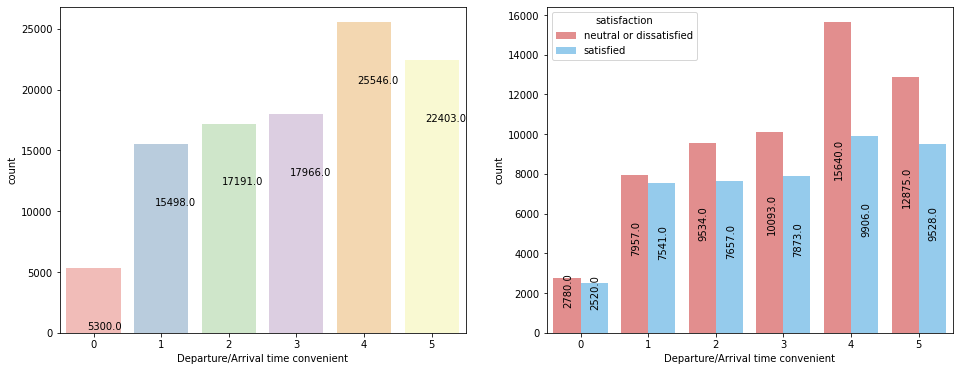

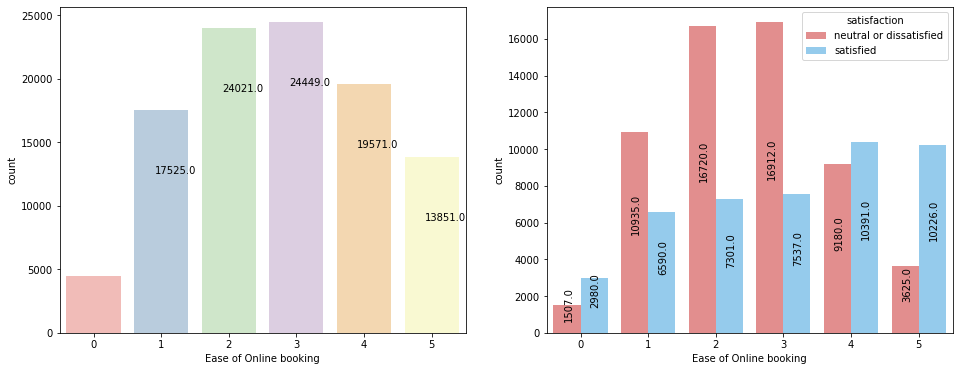

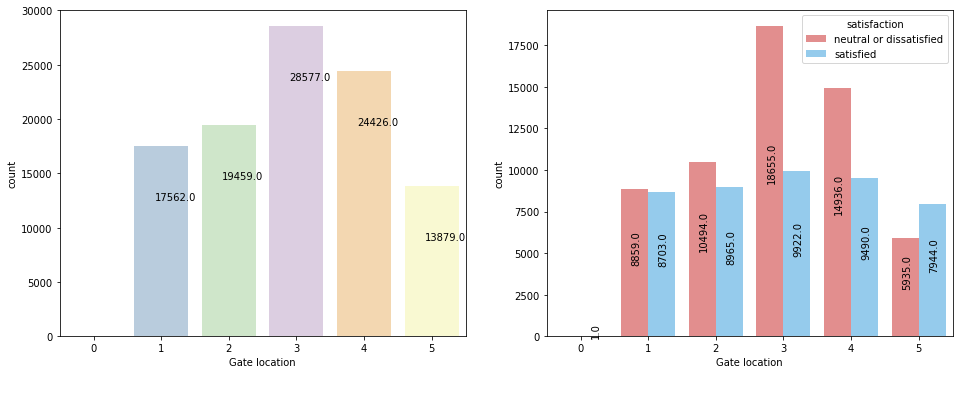

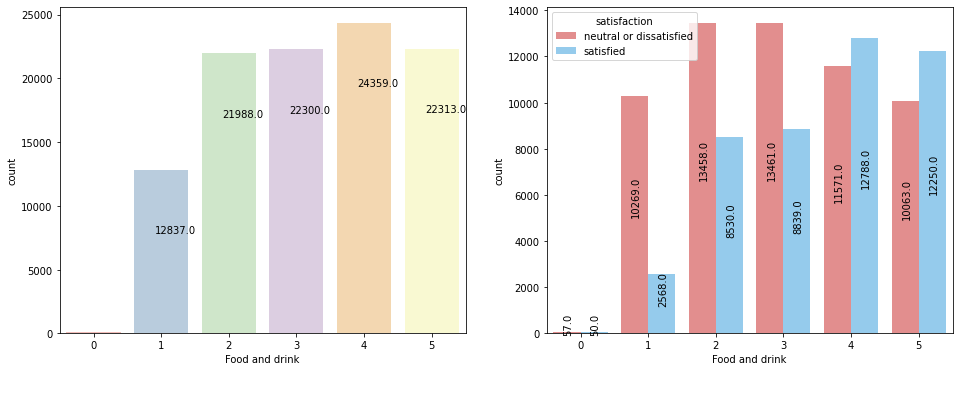

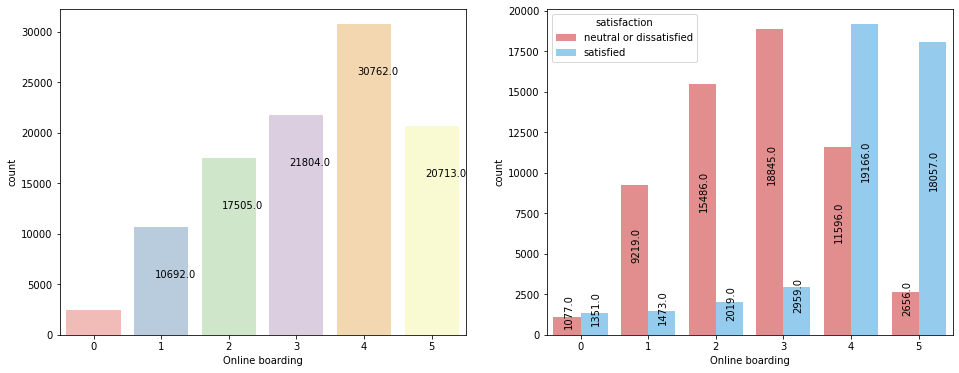

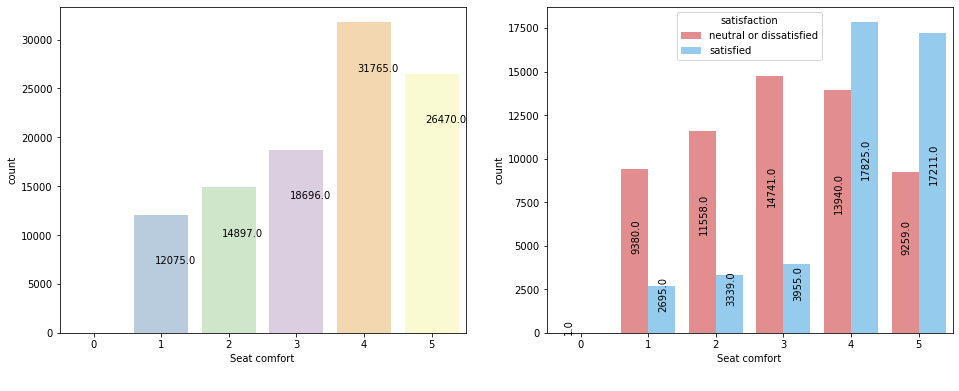

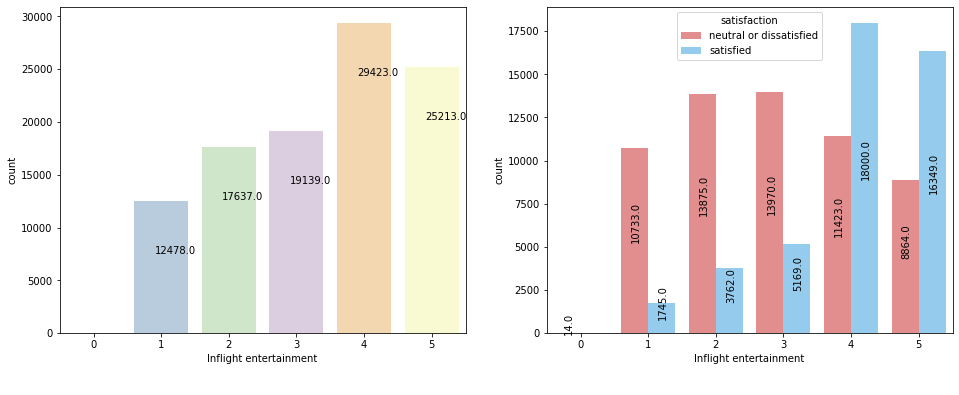

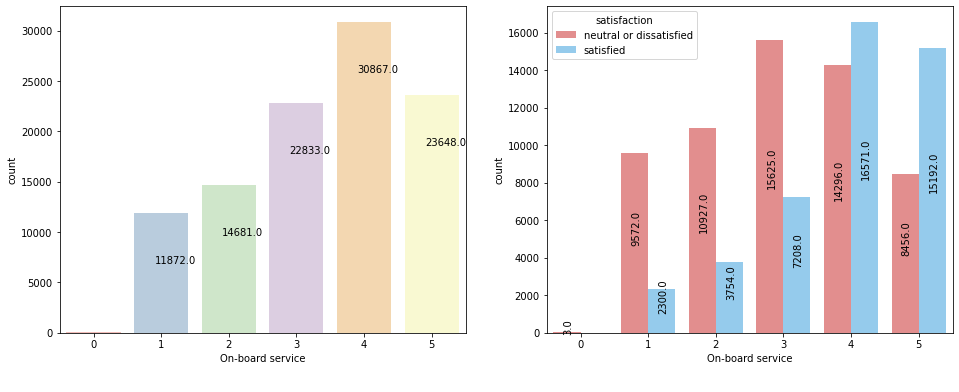

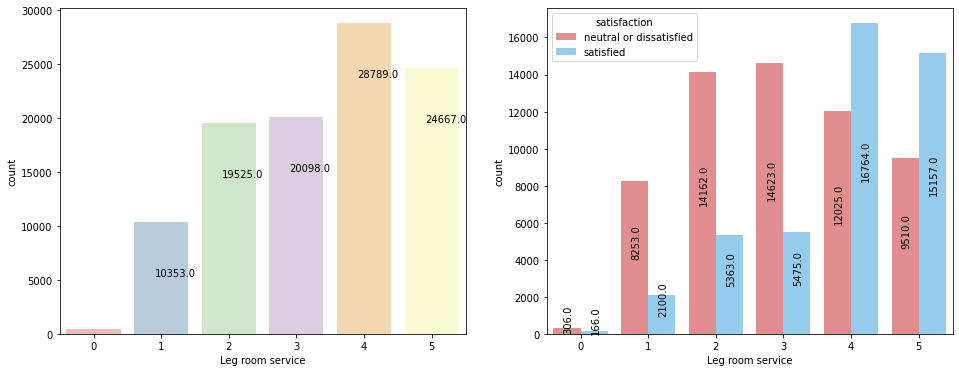

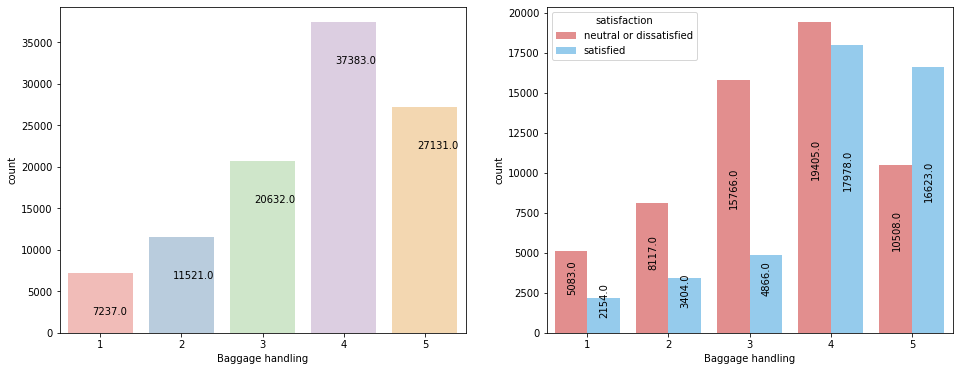

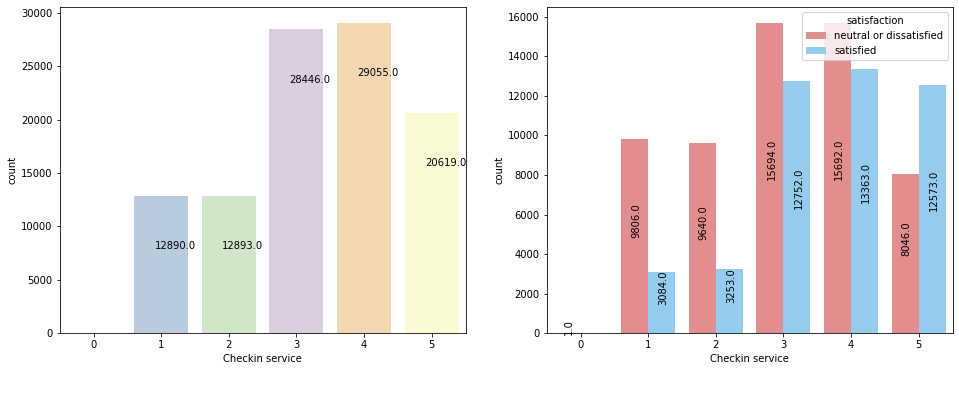

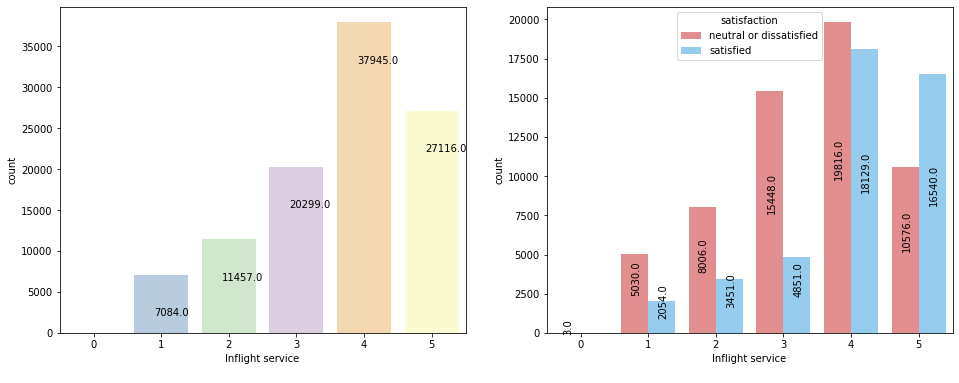

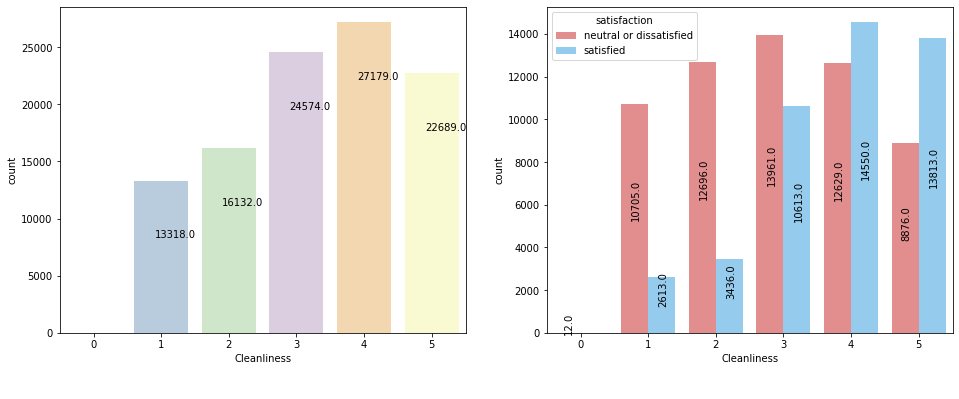

In [ ]:
categorics=['Gender', 'Customer Type','Type of Travel', 'Class','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
for i in categorics:
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    ax=sns.countplot(x=train2[i],palette="Pastel1")
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()-5000))
    plt.subplot(1,2,2)
    ax=sns.countplot(x=train2[i],hue=train2.satisfaction,palette=["#f08080","#87cefa"]) 
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()/2),rotation=90)
    plt.show()

1. make a study why some customers become disloyal (survey or a feedback)
3. the business travel is more than personal travel( making trips with good offers to increase the personal travel) 
    - most personal travelers travel in eco class which hasn't good service.(shown below)
4. imporve the service in Eco class and make offers in eco plus .
5. imporve the wifi service because it affects the overall satisfaction. 
 
7. imporve the online booking as it have an effect on overall satisfaction.

9.  working on the food and drinks quality .
10. online boarding ( affects the satisfaction very much ).
12. provide more ways of Inflight entertainment.

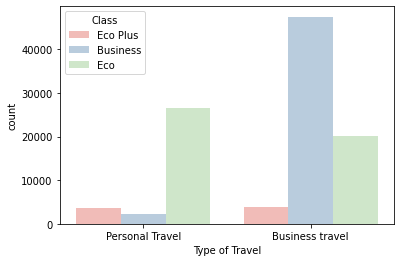

In [ ]:
sns.countplot(x=train2["Type of Travel"],hue=train2["Class"],palette="Pastel1") 

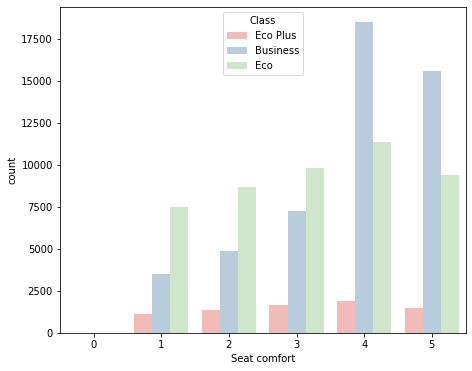

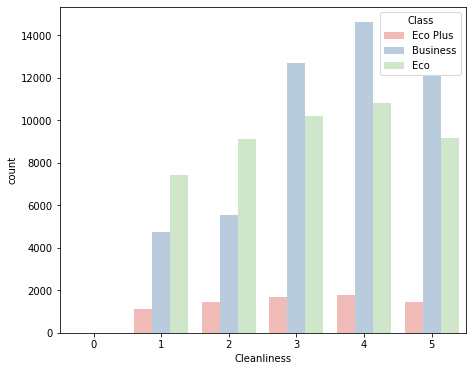

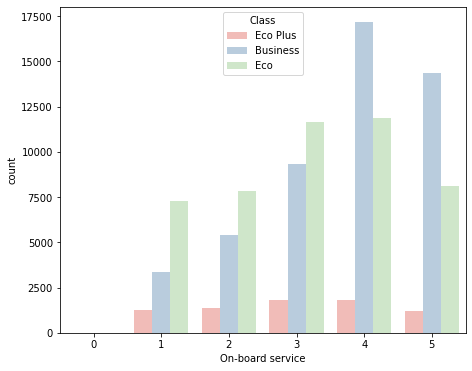

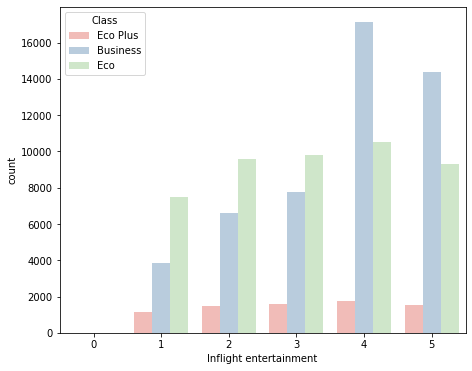

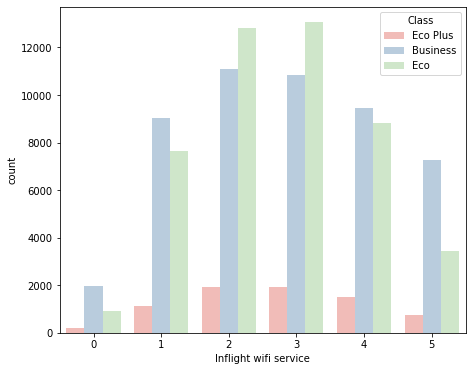

In [ ]:
l=["Seat comfort","Cleanliness","On-board service","Inflight entertainment","Inflight wifi service"]
for i in l:
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,2)
    sns.countplot(x=train2[i],hue=train2["Class"],palette="Pastel1")
    plt.show()


- most of people who are satisfied with different service traveling in Business class
- هنزود سعر التيكيت شوية وهنزود الخدمات ف ال eco

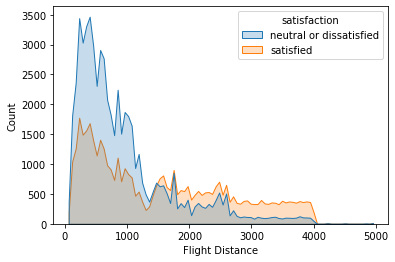

In [ ]:
sns.histplot(x='Flight Distance',hue="satisfaction",data=train2,element="poly")

 as the distance increases, the satisfaction increases!!!

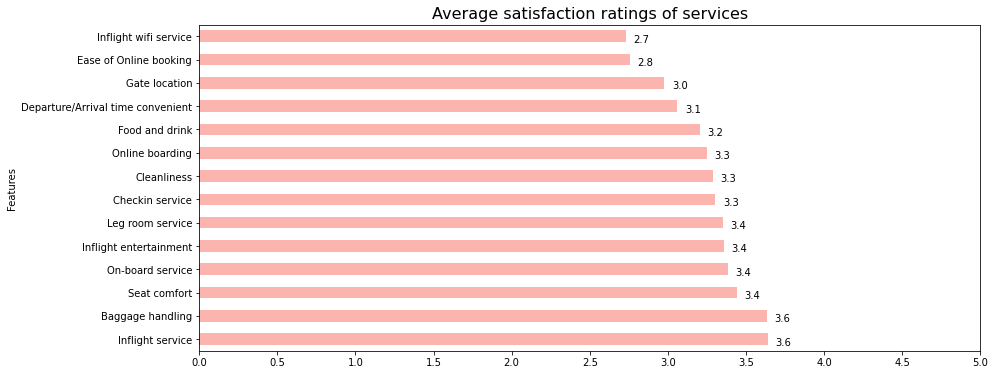

In [ ]:
categorics=['Gender', 'Customer Type','Type of Travel', 'Class','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
for i in ['Gender','Customer Type','Type of Travel','Class']:
    categorics.remove(i)
total = float(len(train))
ax = train[categorics].mean().sort_values(ascending=False).plot(kind="barh",ylabel="Features",colormap="Pastel1",xticks=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],figsize=(14,6))
plt.title('Average satisfaction ratings of services', fontsize=16)
for p in ax.patches:
    count = '{:.1f}'.format(p.get_width())
    x, y = p.get_x() + p.get_width()+0.15, p.get_y()
    ax.annotate(count, (x, y), ha='right')

- we need to work in the features which has less average satisfaction ratings.

# Preprocessing

- Missing values
- Outliers

__Missing value__ : As shown above , Num of Null values are small so we can drop them 
    

- missing values was in Arrival Delay in Minutes column .. and we drop this column .
- then now, we have no null values

In [ ]:
train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

In [ ]:
test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

_______________________________

__Dealing with Outliers__

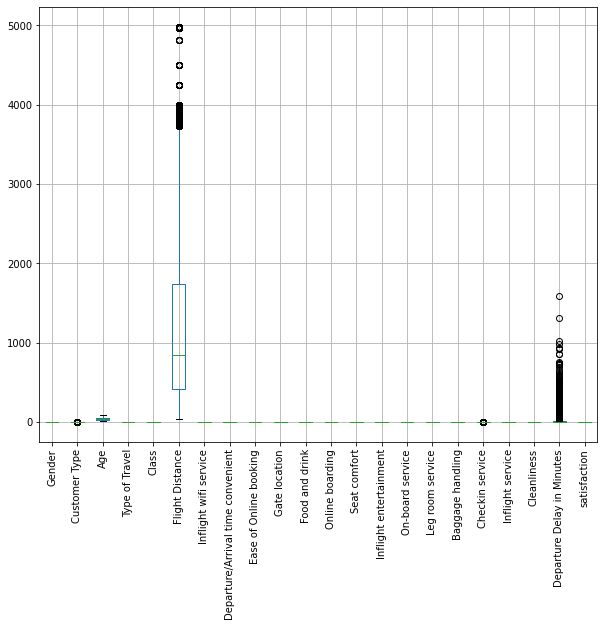

In [ ]:
plt.figure(figsize=(10,8))
train.boxplot(rot=90)

- ##### As we detect above outliers are in :
    - Flight Distance 
    - Departure Delay in Minutes
    - Arrival Delay in Minutes(was dropped)


In [ ]:
def find_outliers(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr

    return ceiling,floor

__For train__

In [ ]:
ul,ll=find_outliers(train["Flight Distance"])
print("Outliers lower bound= ",ll)
print("Outliers upper bound= ",ul)
d=train.shape[0]-train[(train["Flight Distance"]>=ll) & (train["Flight Distance"]<=ul) ].shape[0]
print("length of outlier data= ",d)

Outliers lower bound=  -1579.5
Outliers upper bound=  3736.5
length of outlier data=  2291


In [ ]:
ul,ll=find_outliers(train["Departure Delay in Minutes"])
print("Outliers lower bound= ",ll)
print("Outliers upper bound= ",ul)
d=train.shape[0]-train[(train["Departure Delay in Minutes"]>=ll) & (train["Departure Delay in Minutes"]<=ul)].shape[0]
print("length of outlier data= ",d)

Outliers lower bound=  -18.0
Outliers upper bound=  30.0
length of outlier data=  14529


In [ ]:
#median imputation
def before_after_median_imputation(x):
    sns.boxplot(train[x])
    plt.title("Box Plot before median imputation")
    plt.show()
    Upper_tail,Lower_tail = find_outliers(train[x])
    med = np.median(train[x])
    for i in train[x]:
        if i > Upper_tail or i < Lower_tail:
                train[x] = train[x].replace(i, med)
    sns.boxplot(train[x])
    plt.title("Box Plot after median imputation")
    plt.show()            

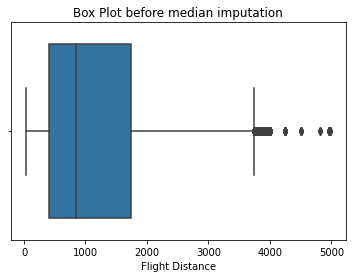

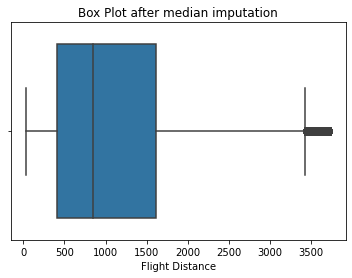

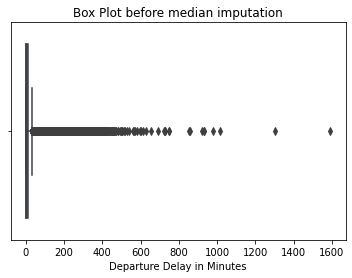

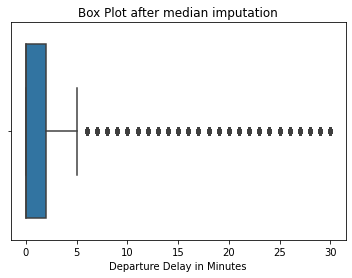

In [ ]:
col=["Flight Distance",'Departure Delay in Minutes']
for column in col:
    before_after_median_imputation(column)

For test

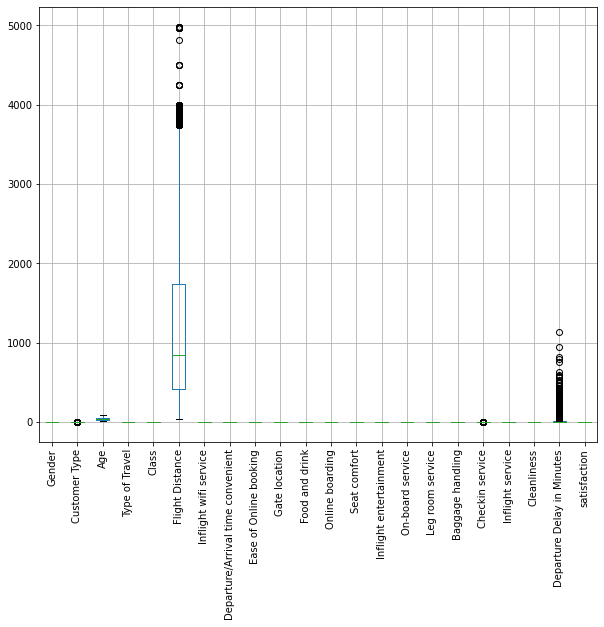

In [ ]:
plt.figure(figsize=(10,8))
test.boxplot(rot=90)

In [ ]:
ul,ll=find_outliers(test["Flight Distance"])
print("Outliers lower bound= ",ll)
print("Outliers upper bound= ",ul)
d=test.shape[0]-test[(test["Flight Distance"]>=ll) & (test["Flight Distance"]<=ul) ].shape[0]
print("length of outlier data= ",d)

Outliers lower bound=  -1581.0
Outliers upper bound=  3739.0
length of outlier data=  584


In [ ]:
ul,ll=find_outliers(test["Departure Delay in Minutes"])
print("Outliers lower bound= ",ll)
print("Outliers upper bound= ",ul)
d=test.shape[0]-test[(test["Departure Delay in Minutes"]>=ll) & (test["Departure Delay in Minutes"]<=ul)].shape[0]
print("length of outlier data= ",d)

Outliers lower bound=  -18.0
Outliers upper bound=  30.0
length of outlier data=  3569


In [ ]:
#median imputation
def before_after_median_imputation_test(x):
    sns.boxplot(test[x])
    plt.title("Box Plot before median imputation")
    plt.show()
    Upper_tail,Lower_tail = find_outliers(test[x])
    med = np.median(test[x])
    for i in test[x]:
        if i > Upper_tail or i < Lower_tail:
                test[x] = test[x].replace(i, med)
    sns.boxplot(test[x])
    plt.title("Box Plot after median imputation")
    plt.show()

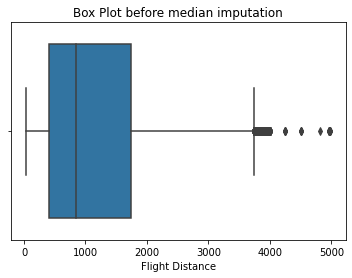

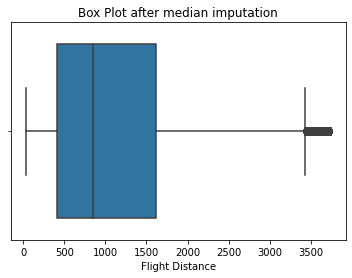

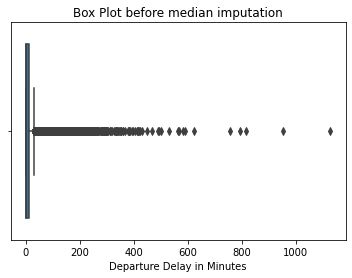

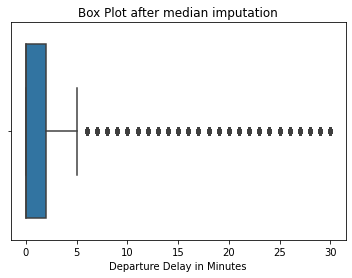

In [ ]:
col=["Flight Distance",'Departure Delay in Minutes']
for column in col:
    before_after_median_imputation_test(column)

## Modeling

**Train Test Split**

In [ ]:
X_train=train.drop("satisfaction" , axis=1)
Y_train=train['satisfaction'].values
X_test=test.drop("satisfaction" , axis=1)
Y_test =test['satisfaction'].values

**Scalling**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.decomposition import PCA 
from sklearn.neighbors import KNeighborsClassifier

### __Models:__
    - LogisticRegression
    - Decision tree
    - SVM
    - KNN with pca
    - RandomForest
    - XGBoost

**LogisticRegression**

In [ ]:
lr = LogisticRegression()

lr.fit(X_train,Y_train)

y_pred_lr = lr.predict(X_test)

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_lr)))

Model accuracy score: 0.8705


In [ ]:
# Check for overfitting and underfitting
print(f"Training Data Score: {lr.score(X_train, Y_train)}")
print(f"Testing Data Score: {lr.score(X_test, Y_test)}")

Training Data Score: 0.8748460117031106
Testing Data Score: 0.8705343393902063


              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14573
           1       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



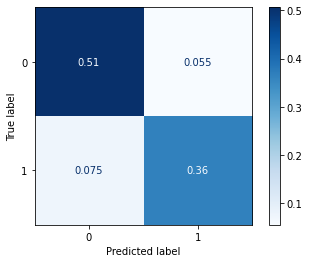

In [ ]:
print(classification_report(Y_test, y_pred_lr))

plot_confusion_matrix(lr, X_test, Y_test,cmap=plt.cm.Blues, normalize = 'all')


**Decision tree**

In [ ]:
# Grid search cv for DT
parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_desicion_tree = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(X_train, Y_train)

print('-----')
print(f'Best parameters {model_desicion_tree.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
print('-----')


-----
Best parameters {'max_depth': 13}
Mean cross-validated accuracy score of the best_estimator: 0.953
-----


In [ ]:
DT = DecisionTreeClassifier( max_depth=13, random_state=42)

# fit the model
DT.fit(X_train, Y_train)
y_pred_DT = DT.predict(X_test)

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_DT)))

Model accuracy score: 0.9546


In [ ]:
# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(DT.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(DT.score(X_test, Y_test)))

Training set score: 0.9673
Test set score: 0.9546


              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14573
           1       0.96      0.93      0.95     11403

    accuracy                           0.95     25976
   macro avg       0.96      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



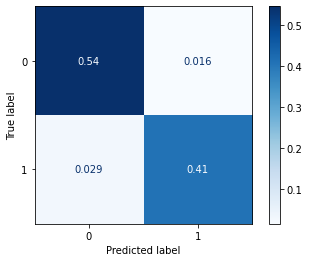

In [ ]:
print(classification_report(Y_test, y_pred_DT))
plot_confusion_matrix(DT, X_test, Y_test,cmap=plt.cm.Blues, normalize = 'all')

__SVM__

In [ ]:
svc = SVC(random_state=0,C=0.1,kernel='rbf')
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_svc)))

Model accuracy score: 0.9426


In [ ]:
# Check for overfitting and underfitting
print(f"Training Data Score: {svc.score(X_train, Y_train)}")
print(f"Testing Data Score: {svc.score(X_test, Y_test)}")

Training Data Score: 0.9430724514936865
Testing Data Score: 0.9426008623344626


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14573
           1       0.94      0.92      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



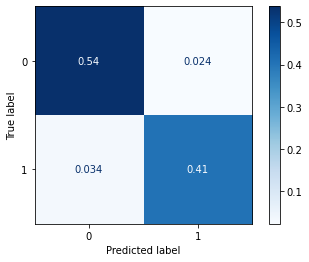

In [ ]:
print(classification_report(Y_test, y_pred_svc))
cm2 = confusion_matrix(Y_test, y_pred_svc,normalize="all")
disp = ConfusionMatrixDisplay(cm2).plot(cmap=plt.cm.Blues)

__KNN with pca__

In [ ]:
pca = PCA(n_components=2)
pca_train = pca.fit_transform(X_train)
pca_test= pca.transform(X_test)

In [ ]:
pca_train.size

207808

In [ ]:
pca_train_df=pd.DataFrame(pca_train)
pca_test_df=pd.DataFrame(pca_test)


In [ ]:
pca_train_df.shape

(103904, 2)

In [ ]:
pca_test_df.shape

(25976, 2)

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=70)
knn.fit(pca_train_df, Y_train)
y_pred_knn = knn.predict(pca_test_df)

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_knn)))

Model accuracy score: 0.8213


In [ ]:
# Check for overfitting and underfitting
print(f"Training Data Score: {knn.score(pca_train_df, Y_train)}")
print(f"Testing Data Score: {knn.score(pca_test_df, Y_test)}")

Training Data Score: 0.8278314598090545
Testing Data Score: 0.8212580843855867


              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14573
           1       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



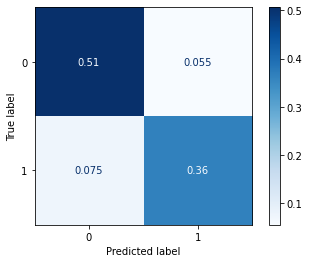

In [ ]:
print(classification_report(Y_test, y_pred_lr))
plot_confusion_matrix(lr, X_test, Y_test,cmap=plt.cm.Blues, normalize = 'all')

__RandomForest__

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Model accuracy score: 0.8705
Training Data Score: 0.8748460117031106
Testing Data Score: 0.8705343393902063
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14573
           1       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



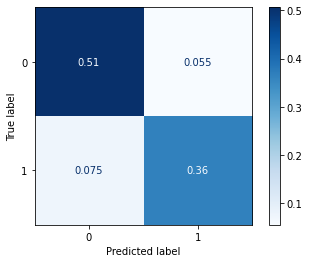

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
y_pred_lr = lr.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_lr)))

# Check for overfitting and underfitting
print(f"Training Data Score: {lr.score(X_train, Y_train)}")
print(f"Testing Data Score: {lr.score(X_test, Y_test)}")

print(classification_report(Y_test, y_pred_lr))
plot_confusion_matrix(lr, X_test, Y_test,cmap=plt.cm.Blues, normalize = 'all')


In [ ]:
rf = RandomForestClassifier(max_depth=25, random_state=0,n_estimators= 1200)
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_rf)))


Model accuracy score: 0.9634


In [ ]:
# Check for overfitting and underfitting
print(f"Training Data Score: {rf.score(X_train, Y_train)}")
print(f"Testing Data Score: {rf.score(X_test, Y_test)}")


Training Data Score: 0.9990568216815522
Testing Data Score: 0.9634277794887589


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



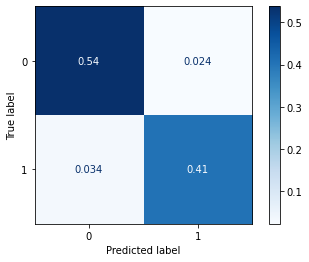

In [ ]:
print(classification_report(Y_test, y_pred_rf))
cm3 = confusion_matrix(Y_test, y_pred_rf,normalize="all")
disp = ConfusionMatrixDisplay(cm2).plot(cmap=plt.cm.Blues)

__XGBoost__

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

y_pred_xgb = xgb.predict(X_test)

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_xgb)))

Model accuracy score: 0.9405


In [ ]:
# Check for overfitting and underfitting
print(f"Training Data Score: {xgb.score(X_train, Y_train)}")
print(f"Testing Data Score: {xgb.score(X_test, Y_test)}")


Training Data Score: 0.9402814136125655
Testing Data Score: 0.9405220203264552


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



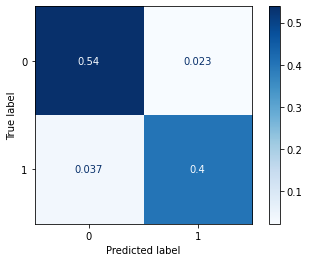

In [ ]:
print(classification_report(Y_test, y_pred_rf))
cm3 = confusion_matrix(Y_test, y_pred_xgb,normalize="all")
disp = ConfusionMatrixDisplay(cm3).plot(cmap=plt.cm.Blues)